<a href="https://colab.research.google.com/github/pranjul6386/Autoencoders/blob/main/Autoencoders_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import PIL
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,datasets,losses,Model
from random import randint

In [2]:
(x_train,y_train), (x_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [ ]:
x_test

In [7]:
 x_train.shape[1:]

(28, 28)

In [10]:
hidden_units1=100
hidden_units2=40
input_layer=layers.Input(shape=( x_train.shape[1:]))
flattened=layers.Flatten()(input_layer)
hidden=layers.Dense(hidden_units1,activation="relu")(flattened)
hiden2=layers.Dense(hidden_units2,activation="relu")(hidden)
encoder = Model(inputs = input_layer, outputs = hiden2, name = 'encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 40)                4040      
Total params: 82,540
Trainable params: 82,540
Non-trainable params: 0
_________________________________________________________________


In [14]:
encoder.layers[1].output_shape

(None, 784)

In [15]:
input_layer_decoder = layers.Input(shape = encoder.output.shape)
upsampled = layers.Dense(hidden_units1, activation = 'relu')(input_layer_decoder)
upsampled = layers.Dense(encoder.layers[1].output_shape[-1], activation = 'relu')(upsampled)
constructed = layers.Reshape(x_train.shape[1:])(upsampled)
decoder = Model(inputs = input_layer_decoder, outputs = constructed, name= 'decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, 40)]        0         
_________________________________________________________________
dense_6 (Dense)              (None, None, 100)         4100      
_________________________________________________________________
dense_7 (Dense)              (None, None, 784)         79184     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 83,284
Trainable params: 83,284
Non-trainable params: 0
_________________________________________________________________


In [19]:
print(decoder.output)
print(encoder.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None), name='reshape/Reshape:0', description="created by layer 'reshape'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")


In [17]:
 decoder(encoder.output)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'decoder')>

In [20]:
autoencoder = Model(inputs = encoder.input, outputs = decoder(encoder.output))
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 40)                4040      
_________________________________________________________________
decoder (Functional)         (None, 28, 28)            83284     
Total params: 165,824
Trainable params: 165,824
Non-trainable params: 0
_________________________________________________________________


In [21]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=64, validation_data = (x_test, x_test))

Epoch 1/50
938/938 [==============================] - 5s 5ms/step - loss: 1825.2341 - val_loss: 1367.7946
Epoch 2/50
938/938 [==============================] - 4s 5ms/step - loss: 1315.3884 - val_loss: 1273.0529
Epoch 3/50
938/938 [==============================] - 4s 5ms/step - loss: 1267.4186 - val_loss: 1246.0161
Epoch 4/50
938/938 [==============================] - 4s 5ms/step - loss: 1244.0667 - val_loss: 1231.1859
Epoch 5/50
938/938 [==============================] - 4s 5ms/step - loss: 1227.6465 - val_loss: 1215.4744
Epoch 6/50
938/938 [==============================] - 4s 5ms/step - loss: 1216.0063 - val_loss: 1205.7865
Epoch 7/50
938/938 [==============================] - 4s 5ms/step - loss: 1209.6846 - val_loss: 1201.4694
Epoch 8/50
938/938 [==============================] - 4s 5ms/step - loss: 1201.7115 - val_loss: 1195.9147
Epoch 9/50
938/938 [==============================] - 4s 5ms/step - loss: 1195.1270 - val_loss: 1186.6371
Epoch 10/50
938/938 [=========================

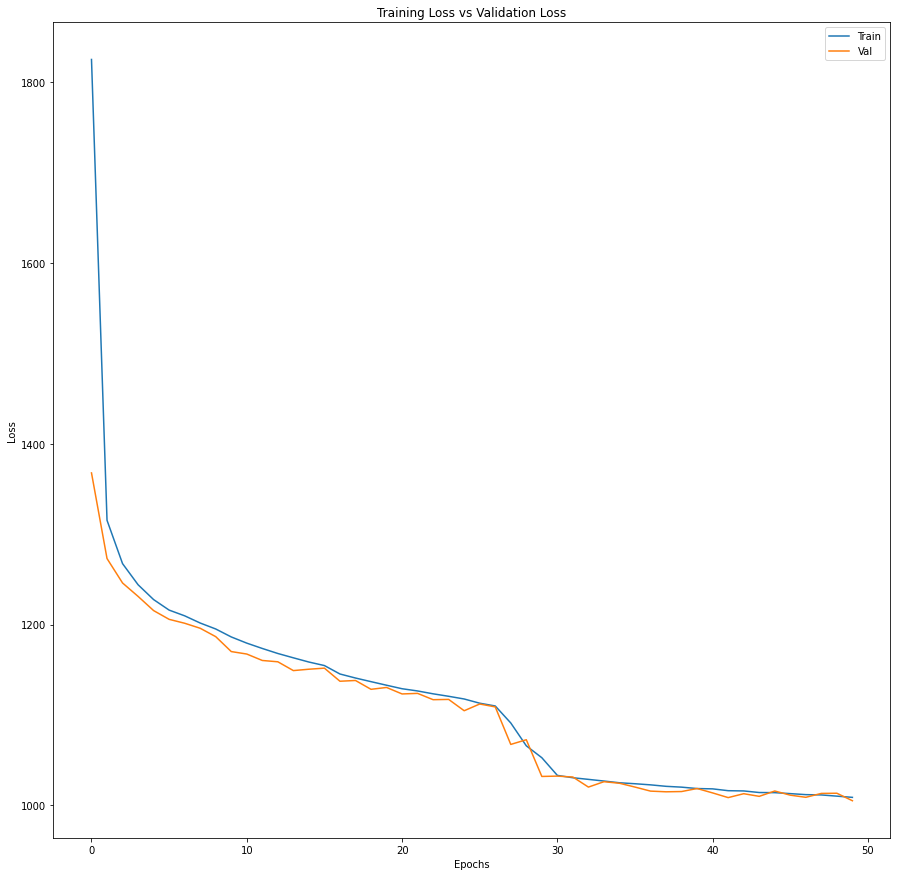

In [22]:
fig, axs = plt.subplots(figsize=(15,15))
axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
axs.title.set_text('Training Loss vs Validation Loss')
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss')
axs.legend(['Train','Val'])

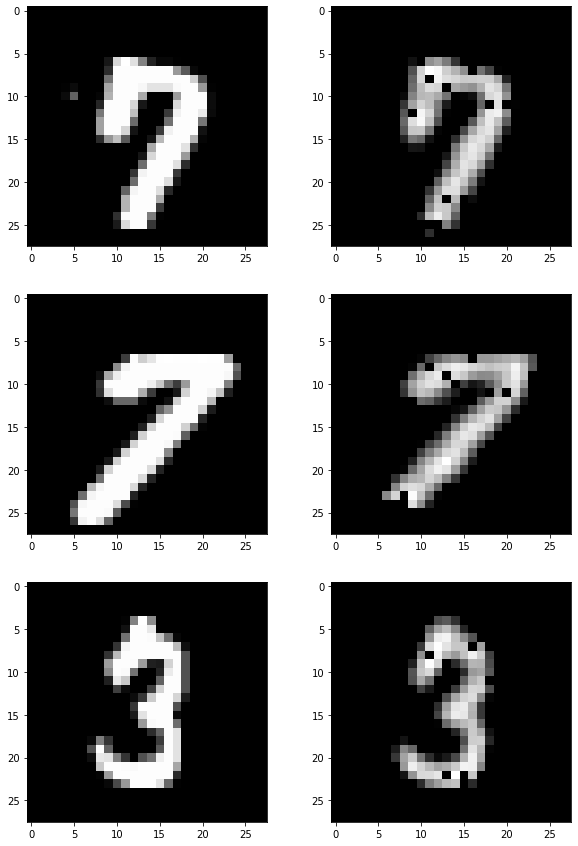

In [23]:
fig, axs = plt.subplots(3,2,figsize=(10,15))
for i in range(3):
  sample1 = x_train[randint(0,x_train.shape[0])]
  axs[i][0].imshow(sample1, cmap = 'gray')
  axs[i][1].imshow(autoencoder(np.expand_dims(sample1,0))[0], cmap = 'gray')